## Download dataset

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2016-10-17 13:03:11--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4,4K) [text/plain]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4,44K  --.-KB/s    in 0,01s   

2016-10-17 13:03:12 (320 KB/s) - ‘iris.data’ saved [4551/4551]



## Load the data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('iris.data', index_col=False,
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_name'])
type(data)

pandas.core.frame.DataFrame

In [4]:
data[:3]

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Do some analysis

In [5]:
data.class_name.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class_name, dtype: int64

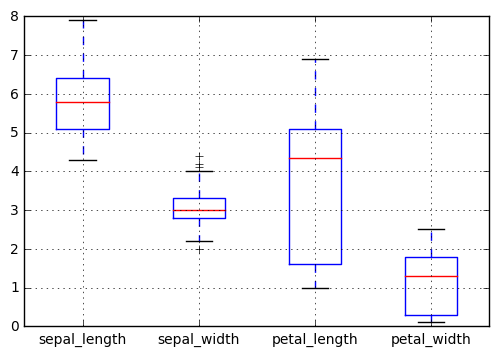

In [6]:
%matplotlib inline
data.boxplot()

## Visualize data

In [7]:
import matplotlib.pyplot as plt
markers_and_colors = {
    'Iris-setosa': ('*','red'),
    'Iris-versicolor': ('x','green'),
    'Iris-virginica': ('+','blue')
}

def visualize(data_x, data_y):
    for x, y, class_name in zip(data_x, data_y, data.class_name):
        marker, color = markers_and_colors[class_name]
        plt.scatter(x, y, marker=marker, color=color)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

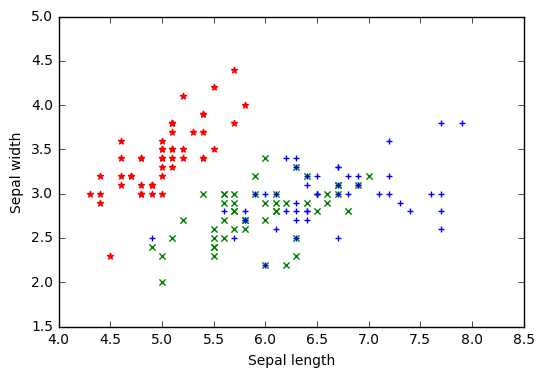

In [8]:
visualize(data.sepal_length, data.sepal_width)

## Use PCA for visualization

In [9]:
data.values[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [10]:
X = data.values[:,:4]

In [11]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

In [12]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(X)

In [13]:
X_reduced[:5]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

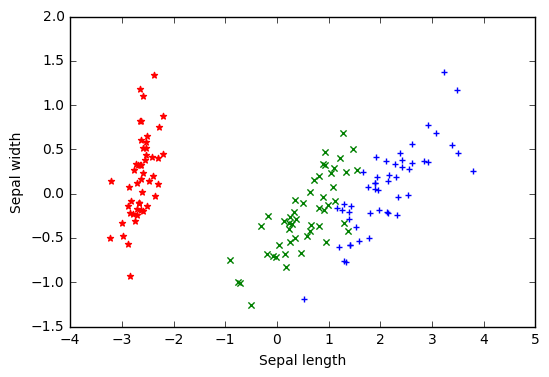

In [14]:
visualize(X_reduced[:,0], X_reduced[:,1])